# Program Script Examples 

The ```Underwriter``` class stores the dictionary definitions of all the elements it creates in ```portfolio```, ```aggreate``` and ```severity``` member dictionaries. These can be accessed directly or used to create a new object. It does not cache actual instances.

By convention name Portfolios in ALL~CAPS, aggregates in CamelCase and severity in lowerCase.

```python
    uw = Underwriter()
    # create objects
    
    # access underlying dictionary definitions
    kind, dict_obj = uw['name']
    
    # create (new) instance 
    new_obj = uw('name')
    
```

There is a lot of flexibility creating portfolios

```python
    port = agg.Portfolio('myNewPortfolioName', [list of: dictionary specs, existing agg objects, names known to uw])
    # eg
    port = agg.Portfolio('newPortfolio', [ 'Agg2', 
                                          uw['Agg2'][1],
                                          uw('Agg2'), 
                                          test['AggA'], 
                                          dict(name='I=OnTheFly', exp_en=1, sev_name='lognorm', sev_a=.5, 
                                               sev_wt=1, sev_scale=10, sev_loc=2, freq_name='poisson')])
    
```

In [5]:
import sys
sys.path.append('c:/s/telos/python')
sys.path.append('c:/s/telos/python/aggregate_project')

import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy.stats as ss
import pandas as pd
import warnings
import logging

from importlib import reload
from IPython.core.display import HTML

import aggregate as agg
import importlib

%matplotlib inline

sns.set('paper', 'ticks', 'plasma', 'serif')
sns.set_palette('muted', 8)
%config InlineBackend.figure_format = 'svg'

np.set_printoptions(linewidth=200)
pd.set_option('max_colwidth', 140)

# warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')

logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

def newobs():
    _ = agg.read_log()
    return _.loc[_.log.str.startswith("creating new"), :]

In [2]:
uw = agg.Underwriter()
test = uw(
f'''
port AGG~TYPES
    agg Agg1 1 claim sev {10*np.exp(-.3**2/2)} * lognorm .3 fixed
    agg Agg2 1 claim sev {10*np.exp(-.3**2/2)} * lognorm .3 + 5 fixed
    agg Agg3 1 claim sev 10 * lognorm 0.5 cv .3 fixed
    agg Agg4 1 claim sev 10 * lognorm 1 cv .5 + 5 fixed
    
port AGG~TYPES~2
    agg Agg5 1 claim sev 10 * gamma .3 fixed
    agg Agg6 1 claim sev 10 * gamma .3 + 5 fixed
    
agg AggA 1 claim sev 2 * pareto 1.6 - 2 fixed
agg AggB 1 claim sev 2 * uniform 5 + 5 fixed

sev sevX 1000 * pareto 2.5 - 1000
''', create_all=True)

c:/s/telos/python/aggregate_project\aggregate\utils.py:707: RuntimeWarning: invalid value encountered in sqrt
  sd = np.sqrt(var)
C:\Users\steve\Anaconda3\envs\Working_Duplicate\lib\site-packages\scipy\stats\_distn_infrastructure.py:870: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\steve\Anaconda3\envs\Working_Duplicate\lib\site-packages\scipy\stats\_distn_infrastructure.py:1958: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


In [24]:
test

{'AGG~TYPES': <aggregate.port.Portfolio object at 0x00000224ADC01B00>, { 'name': 'AGG~TYPES', 'spec': [{'name': 'Agg1', 'note': ''}, {'name': 'Agg2', 'note': ''}, {'name': 'Agg3', 'note': ''}, {'name': 'Agg4', 'note': ''}]},
 'AGG~TYPES~2': <aggregate.port.Portfolio object at 0x00000224ADC01FD0>, { 'name': 'AGG~TYPES~2', 'spec': [{'name': 'Agg5', 'note': ''}, {'name': 'Agg6', 'note': ''}]},
 'Agg1': <aggregate.distr.Aggregate object at 0x00000224AD9F7AC8> name: Agg1,
 'Agg2': <aggregate.distr.Aggregate object at 0x00000224AD9F7C48> name: Agg2,
 'Agg3': <aggregate.distr.Aggregate object at 0x00000224AD9F7D08> name: Agg3,
 'Agg4': <aggregate.distr.Aggregate object at 0x00000224AD9F7DC8> name: Agg4,
 'Agg5': <aggregate.distr.Aggregate object at 0x00000224AD9F7888> name: Agg5,
 'Agg6': <aggregate.distr.Aggregate object at 0x00000224AD9F74C8> name: Agg6,
 'AggA': <aggregate.distr.Aggregate object at 0x00000224AD9F7288> name: AggA,
 'AggB': <aggregate.distr.Severity object at 0x00000224ADC30

In [26]:
uw['AggB']

('agg',
 {'name': 'AggB',
  'exp_en': 1.0,
  'sev_name': 'uniform',
  'sev_a': 5.0,
  'sev_wt': 1,
  'sev_scale': 2.0,
  'sev_loc': 5.0,
  'freq_name': 'fixed',
  'note': ''})

In [28]:
for a in test['AGG~TYPES'].agg_list:
    print(a)

Aggregate: Agg1
	EN=1.0, CV(N)=0.000
	1 severity, EX=10.0, ' CV(X)=0.307
	EA=10.0, CV=0.307
Aggregate: Agg2
	EN=1.0, CV(N)=0.000
	1 severity, EX=15.0, ' CV(X)=0.205
	EA=15.0, CV=0.205
Aggregate: Agg3
	EN=1.0, CV(N)=0.000
	1 severity, EX=5.0, ' CV(X)=0.300
	EA=5.0, CV=0.300
Aggregate: Agg4
	EN=1.0, CV(N)=0.000
	1 severity, EX=15.0, ' CV(X)=0.333
	EA=15.0, CV=0.333


In [29]:
# create an object (not a stored object)
uw('sevX')

<aggregate.distr.Severity object at 0x00000224ADC38BE0> of type pareto

In [30]:
# dictionary of all aggregates created is uw.aggregate
uw.list().tail()

,Portfolio,Aggregate,Severity
40,,a,
41,,b,
42,,c,
43,,quake,
44,,wind,


In [31]:
# more detail 
uw.describe().tail(20)

,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
Agg1,aggregate,lognorm,0.0,0.3,0,1,0.0,0,
Agg2,aggregate,lognorm,0.0,0.3,0,1,0.0,0,
Agg3,aggregate,lognorm,5.0,0.0,0,1,0.0,0,
Agg4,aggregate,lognorm,10.0,0.0,0,1,0.0,0,
Agg5,aggregate,gamma,0.0,0.3,0,1,0.0,0,
Agg6,aggregate,gamma,0.0,0.3,0,1,0.0,0,
AggA,aggregate,pareto,0.0,1.6,0,1,0.0,0,
AggB,aggregate,uniform,0.0,5.0,0,1,0.0,0,
directorsA,severity,lognorm,10000000.0,0.0,0,0,0.0,0,"directors and officers liability class a, sigma=1.25"


In [36]:
# now we can create a new portfolio - remeber uw[] returns (type, object)
# to create by name need to pass in the underwriter object 
port = agg.Portfolio('NEW~PORTFOLIO', [ 'Agg3', 
                                          uw['Agg2'][1],
                                          uw('AggB'), 
                                          test['AggA'], 
                                          dict(name='AggNew', exp_en=1, sev_name='lognorm', sev_a=.5, 
                                               sev_wt=1, sev_scale=10, sev_loc=2, freq_name='poisson')], uw=uw)

In [37]:
port

<aggregate.port.Portfolio object at 0x00000224ADBE5A58>, { 'name': 'NEW~PORTFOLIO', 'spec': [{'name': 'Agg3', 'note': ''}, {'name': 'Agg2', 'note': ''}, {'name': 'AggB', 'note': ''}, {'name': 'AggA', 'note': ''}, {'name': 'AggNew', 'note': ''}]}

In [38]:
port.recommend_bucket()

,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs17,bs18,bs19,bs20
line,,,,,,,,,,,
Agg3,0.011586,0.005793,0.002897,0.001448,0.000724,0.000362,0.000181,0.000091,0.000045,0.000022,0.000011
Agg2,0.028476,0.014238,0.007119,0.003559,0.001780,0.000890,0.000445,0.000222,0.000111,0.000055,0.000028
AggB,0.007602,0.003801,0.001900,0.000950,0.000475,0.000238,0.000119,0.000059,0.000030,0.000015,0.000007
AggA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AggNew,0.088240,0.044120,0.022060,0.011030,0.005515,0.002758,0.001379,0.000689,0.000345,0.000171,0.000086
total,0.135904,0.067952,0.033976,0.016988,0.008494,0.004247,0.002123,0.001062,0.000531,0.000264,0.000133


In [41]:
port.update(log2=16, bs=.0025, remove_fuzz=True, add_exa=True)

C:\Users\steve\Anaconda3\envs\Working_Duplicate\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [42]:
port

,Agg2,Agg3,AggA,AggB,AggNew,total
"(freq, mean)",1,1,1,1,1,5
"(freq, cv)",0,0,0,0,1,0.2
"(freq, skew)",NaN,NaN,NaN,NaN,1,1
"(sev, mean)",15,5,3.33333,6,13.3315,8.53296
"(sev, cv)",0.204586,0.3,NaN,0.096225,0.452988,0.561567
"(sev, skew)",0.949535,0.927,NaN,1.73085e-10,1.75019,4.58235
"(agg, mean)",15,5,3.33333,6,13.3315,42.6648
"(agg, cv)",0.204586,0.3,NaN,0.096225,1.09782,0.315989
"(agg, skew)",0.949535,0.927,NaN,1.7338e-10,1.34404,1.95657
Mean,15,5,3.33333,6,13.3315,42.6648


In [44]:
port.audit_df.T

,Agg2,Agg3,AggA,AggB,AggNew,total
Mean,15,5,3.33333,6,13.3315,42.6648
CV,0.204586,0.3,NaN,0.096225,1.09782,0.315989
Skew,0.949535,0.927,NaN,1.7338e-10,1.34404,1.95657
Limit,inf,inf,inf,inf,inf,inf
P99.9Est,29.1589,11.8641,0,7.78415,90.3583,126.004
Sum log,1,1,1,1,1,0.999479
EmpMean,15,5,2.96102,6,13.3314,42.1968
EmpCV,0.204586,0.3,2.46144,0.0962252,1.0978,0.389177
EmpSkew,0.949535,0.927,9.09196,-2.95366e-13,1.34373,1.41542
EmpEX1,15,5,2.96102,6,13.3314,42.1968


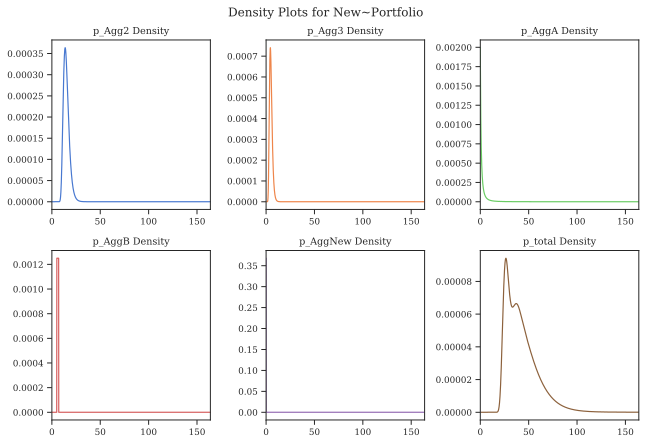

In [49]:
port.plot(subplots=True, height=3)

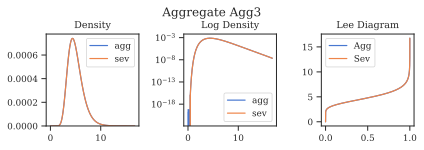

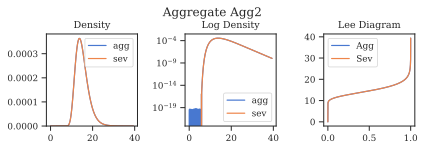

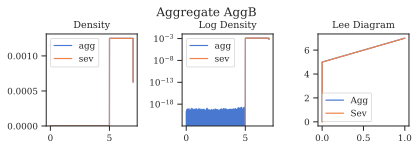

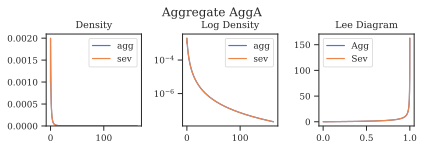

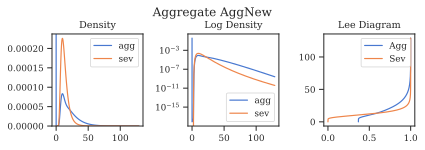

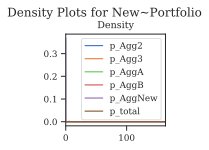

In [53]:
warnings.simplefilter("ignore")
for a in port.agg_list:
    a.plot()
port.plot()

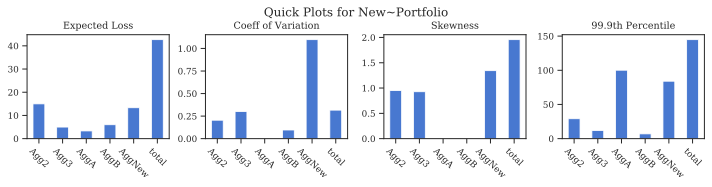

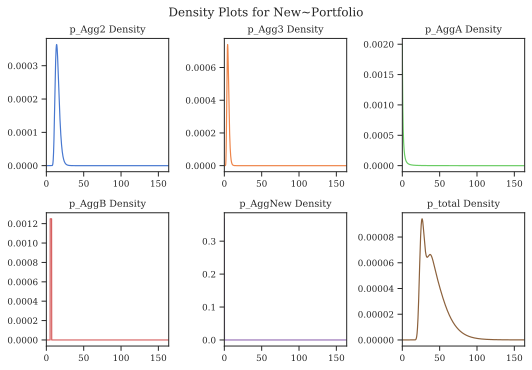

In [63]:
port.plot('quick', height=2.5)
port.plot(subplots=True, height=2.5)

In [ ]:
uw.describe()

In [3]:
# uw able to use meta construction 
uw = agg.Underwriter(glob=globals())

In [78]:
test_string_0 = """
# use to create sev and aggs so can illustrate use of sev. and agg. below 

sev sev1 lognorm 10 cv .3

agg Agg0 1 claim sev lognorm 10 cv .09 fixed

"""

test_string_1 = f'''
agg Agg1  1 claim sev {10*np.exp(-.3**2/2)} * lognorm .3      fixed note{{sigma=.3 mean=10}}
agg Agg2  1 claim sev {10*np.exp(-.3**2/2)} * lognorm .3 + 5  fixed note{{shifted right by 5}}''' \
'''
agg Agg3  1 claim sev 10 * lognorm 0.5 cv .3                  fixed note{mean 0.5 scaled by 10 and cv 0.3}
agg Agg4  1 claim sev 10 * lognorm 1 cv .5 + 5                fixed note{shifted right by 5}

agg Agg5  1 claim sev 10 * gamma .3                           fixed note{gamma distribution....can use any two parameter scipy.stats distribution plus expon, uniform and normal}
agg Agg6  1 claim sev 10 * gamma 1 cv .3 + 5                  fixed note{mean 10 x 1, cv 0.3 shifted right by 5}
    
agg Agg7  1 claim sev 2 * pareto 1.6 - 2                      fixed note{pareto alpha=1.6 lambda=2}
agg Agg8  1 claim sev 2 * uniform 5 + 2.5                     fixed note{uniform 2.5 to 12.5}

agg Agg9  1 claim 10 x  2 sev lognorm 20 cv 1.5               fixed note{10 x 2 layer, 1 claim}
agg Agg10 10 loss 10 xs 2 sev lognorm 20 cv 1.5               fixed note{10 x 2 layer, total loss 10, derives requency}
agg Agg11 14 prem at .7    10 x 1 sev lognorm 20 cv 1.5       fixed note{14 prem at .7 lr derive frequency}
agg Agg11 14 prem at .7 lr 10 x 1 sev lognorm 20 cv 1.5       fixed note{14 prem at .7 lr derive frequency, lr is optional}

agg Agg12: 14 prem at .7 lr (10 x 1) sev (lognorm 20 cv 1.5)  fixed note{trailing semi and other punct ignored};

agg Agg13: 1 claim sev 50 * beta 3 2 + 10 fixed note{scaled and shifted beta, two parameter distribution}
agg Agg14: 1 claim sev 100 * expon + 10   fixed note{exponential single parameter, needs scale, optional shift}
agg Agg15: 1 claim sev 10 * norm + 50     fixed note{normal is single parameter too, needs scale, optional shift}

# mixtures
agg MixedLine1: 1 claim 25 xs 0 sev lognorm 10                   cv [0.2, 0.4, 0.6, 0.8, 1.0] wts=5             fixed note{equally weighted mixture of 5 lognormals different cvs}
agg MixedLine2: 1 claim 25 xs 0 sev lognorm [10, 15, 20, 25, 50] cv [0.2, 0.4, 0.6, 0.8, 1.0] wts=5             fixed note{equal weighted mixture of 5 lognormals different cvs and means}
agg MixedLine3: 1 claim 25 xs 0 sev lognorm 10                   cv [0.2, 0.4, 0.6, 0.8, 1.0] wt [.2, .3, .3, .15, .05]   fixed note{weights scaled to equal 1 if input}

# limit profile
agg LimitProfile1: 1 claim [1, 5, 10, 20] xs 0 sev lognorm 10 cv 1.2 wt [.50, .20, .20, .1]   fixed note{maybe input EL by band for wt}
agg LimitProfile2: 5 claim            20  xs 0 sev lognorm 10 cv 1.2 wt [.50, .20, .20, .1]   fixed note{input EL by band for wt}
agg LimitProfile3: [10 10 10 10] claims [inf 10 inf 10] xs [0 0 5 5] sev lognorm 10 cv 1.25   fixed note{input counts directly}

# limits and distribution blend
agg Blend1 50  claims [5 10 15] x 0         sev lognorm 12 cv [1, 1.5, 3]          fixed note{options all broadcast against one another, 50 claims of each}
agg Blend2 50  claims [5 10 15] x 0         sev lognorm 12 cv [1, 1.5, 3] wt=3     fixed note{options all broadcast against one another, 50 claims of each}

agg Blend5cv1  50 claims  5 x 0 sev lognorm 12 cv 1 fixed
agg Blend10cv1 50 claims 10 x 0 sev lognorm 12 cv 1 fixed
agg Blend15cv1 50 claims 15 x 0 sev lognorm 12 cv 1 fixed

agg Blend5cv15  50 claims  5 x 0 sev lognorm 12 cv 1.5 fixed
agg Blend10cv15 50 claims 10 x 0 sev lognorm 12 cv 1.5 fixed
agg Blend15cv15 50 claims 15 x 0 sev lognorm 12 cv 1.5 fixed

# semi colon can be used for newline and backslash works
agg Blend5cv3  50 claims  5 x 0 sev lognorm 12 cv 3 fixed; agg Blend10cv3 50 claims 10 x 0 sev lognorm 12 cv 3 fixed
agg Blend15cv3 50 claims 15 x 0 sev \
lognorm 12 cv 3 fixed

# not sure if it will broadcast limit profile against severity mixture... 
agg LimitProfile4: [10 30 15 5] claims [inf 10 inf 10] xs [0 0 5 5] sev lognorm 10 cv [1.0, 1.25, 1.5] wts=3  fixed note{input counts directly}
''' \
f'''
# the logo
agg logo 1 claim {np.linspace(10, 250, 20)} xs 0 sev lognorm 100 cv 1 fixed'''

test_string_2 = '''
# empirical distributions 
agg dHist1 1 claim sev dhistogram xps [1, 10, 40] [.5, .3, .2] fixed     note{discrete histogram}
agg cHist1 1 claim sev chistogram xps [1, 10, 40] [.5, .3, .2] fixed     note{continuous histogram, guessed right hand endpiont}
agg cHist2 1 claim sev chistogram xps [1 10 40 45] [.5 .3 .2]  fixed     note{continuous histogram, explicit right hand endpoint, don't need commas} 

'''

test_string_3 = '''
# sev, agg, port and meta: using built in objects [have to exist prior to running program]
agg ppa:    1e6 * agg.PPAL                   note{this is using lmult on aggs, needs a dictionary specification to adjust means}
agg cauto:  1e7 * agg.CAL
agg mdist: 5000 * agg.dHist1
agg m2dist: 1 claim sev meta.agg_object fixed note{can use meta to pull in other objects and use as severity}
'''

test_string_4 = '''
# frequency options 
agg A1: 50  claims          sev(gamma 12 cv .30) (mixed gamma 0.014)
agg A2: 50  claims 30 xs 10 sev gamma 12 cv .30 (mixed gamma 0.014)
agg A3: 50  claims          sev gamma 12 cv 1.30 (mixed gamma 0.014)
agg A4: 50  claims 30 xs 20 sev gamma 12 cv 1.30 (mixed gamma 0.14)
agg B 15 claims 15 xs 15 sev lognorm 12 cv 1.5 + 2 mixed gamma 4.8
agg Cat 1.7 claims 25 xs 5  sev 25 * pareto 1.3 0 - 25 poisson

'''

test_strings = [test_string_0, test_string_1, test_string_2, test_string_3, test_string_4]

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,0.325733,0.323698,-0.00624839,0.695048,0.648796,-0.0665453,5.3785
Freq,1.000000,,,0.000000,,,
Agg,0.325733,0.323698,-0.00624839,0.695048,0.648796,-0.0665453,5.3785


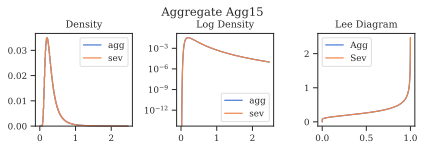

In [99]:
b = uw('agg Agg15: 1 claim sev 1 * invgamma 4.07 fixed')
b.plot()
b

In [71]:
agg_object = uw('cHist2')
agg_object.easy_update()

In [69]:
globals()['agg_object']

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,18.75,18.7497,-1.4723e-05,0.82383,0.823875,5.47437e-05,0.517366
Freq,1.00,,,0.00000,,,
Agg,18.75,18.7497,-1.4723e-05,0.82383,0.823875,5.47437e-05,0.517366


In [50]:
uw.describe('aggregate').tail()

,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
A3,aggregate,gamma,1.200000e+01,0.0,0.0,50,0.014,0.0,
A4,aggregate,gamma,1.200000e+01,0.0,0.0,50,0.140,0.0,
Cat,aggregate,pareto,0.000000e+00,1.3,0.0,1.7,0.000,0.0,
ppa,aggregate,lognorm,5.000000e+09,0.0,0.0,5.67607e+06,0.080,0.0,
cauto,aggregate,lognorm,4.000000e+11,0.0,0.0,462316,0.240,0.0,


In [79]:
# write test just parses, does not create anything; returns three pandas dfs with helpful information
# _, big_test_df, _ = uw.write_test(test_string_3)
# .write() or () actually creates objects, portfolios unlesss create_all set 
# force update
uw.glob = globals()
uw.create_all = True 
uw.update = True
uw.log2 = 8
# display(uw.write_test(test_string_4)[1])
big_test = uw(test_string_4)

In [77]:
big_test

{'A1': <aggregate.distr.Aggregate object at 0x0000021DCCB6BB88> name: A1,
 'A2': <aggregate.distr.Aggregate object at 0x0000021DCC4311C8> name: A2,
 'A3': <aggregate.distr.Aggregate object at 0x0000021DCC431EE8> name: A3,
 'A4': <aggregate.distr.Aggregate object at 0x0000021DCC431BE8> name: A4,
 'B': <aggregate.distr.Aggregate object at 0x0000021DCC5AC708> name: B,
 'Cat': <aggregate.distr.Aggregate object at 0x0000021DCC650EE8> name: Cat,
 'ppa': <aggregate.distr.Aggregate object at 0x0000021DCC650108> name: ppa,
 'mdist': <aggregate.distr.Aggregate object at 0x0000021DCC650A08> name: mdist}

In [39]:
# create from dictionary defintion 
agg.Aggregate(**uw['PPAL'][1])

,E(X),CV(X),Skew(X)
X,,,
Sev,5.000000e+03,,
Freq,5.676073e+06,0.0800011,0.16
Agg,2.838037e+10,0.08,0.16


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,15.0,14.9836,-0.00109166,0.204586,0.201928,-0.012992,0.949535
Freq,1.0,,,0.000000,,,
Agg,15.0,14.9836,-0.00109166,0.204586,0.201928,-0.012992,0.949535


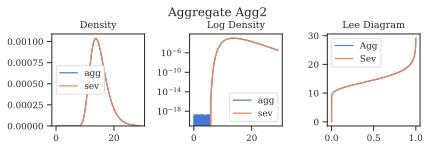

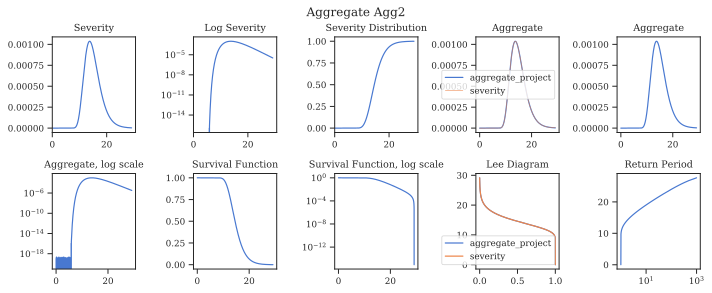

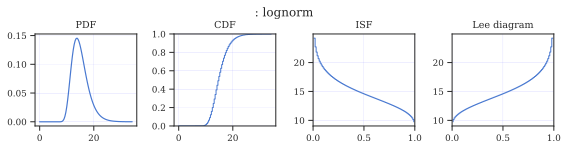

In [36]:
display(big_test['Agg2'])
big_test['Agg2'].plot()
big_test['Agg2'].plot('long')
big_test['Agg2'].sevs[0].plot()

In [40]:
uw.describe('aggregate')

,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
Cata,aggregate,pareto,0,2.10,0,3.7,0.000,0.0,tropical storms and up US wind events
Catb,aggregate,pareto,0,1.70,0,1.7,0.000,0.0,category 1 and up US wind events
Catc,aggregate,pareto,0,1.40,0,1.3,0.000,0.0,category 3 and up US wind events
Catd,aggregate,pareto,0,1.10,0,0.4,0.000,0.0,category 4 and up US wind events
Cate,aggregate,pareto,0,0.90,0,0.1,0.000,0.0,category 5 and up US wind events
Scs,aggregate,lognorm,1e+08,0.00,0,25,0.000,0.0,industry severe convective storm losses
Casxol,aggregate,lognorm,5e+07,0.00,0,0.5,0.000,0.0,"Bermuda like casualty excess of loss book, 0.5 claims"
Noncata,aggregate,lognorm,50000,0.00,0,1e+06,0.175,0.0,"industry total non cat losses, all lines"
CAL,aggregate,lognorm,40000,0.00,0,462316,0.240,0.0,"US statutory industry commercial auto liability, SNL 2017"


In [27]:
pd.set_option('max_colwidth', 100)
big_test_df

,exp_attachment,exp_el,exp_en,exp_limit,exp_lr,exp_premium,freq_a,freq_b,freq_name,name,note,sev_a,sev_b,sev_cv,sev_loc,sev_mean,sev_name,sev_scale,sev_wt
Agg1,0,0.0,1,inf,0.0,0.0,0,0,fixed,Agg1,sigma=.3 mean=10,0.3,0,0,0.0,0,lognorm,9.559975,1
Agg2,0,0.0,1,inf,0.0,0.0,0,0,fixed,Agg2,shifted right by 5,0.3,0,0,5.0,0,lognorm,9.559975,1
Agg3,0,0.0,1,inf,0.0,0.0,0,0,fixed,Agg3,mean 0.5 scaled by 10 and cv 0.3,0.0,0,0.3,0.0,5,lognorm,0.000000,1
Agg4,0,0.0,1,inf,0.0,0.0,0,0,fixed,Agg4,shifted right by 5,0.0,0,0.5,5.0,10,lognorm,0.000000,1
Agg5,0,0.0,1,inf,0.0,0.0,0,0,fixed,Agg5,"gamma distribution....can use any two parameter scipy.stats distribution plus expon, uniform and...",0.3,0,0,0.0,0,gamma,10.000000,1
Agg6,0,0.0,1,inf,0.0,0.0,0,0,fixed,Agg6,"mean 10 x 1, cv 0.3 shifted right by 5",0.0,0,0.3,5.0,10,gamma,0.000000,1
Agg7,0,0.0,1,inf,0.0,0.0,0,0,fixed,Agg7,pareto alpha=1.6 lambda=2,1.6,0,0,-2.0,0,pareto,2.000000,1
Agg8,0,0.0,1,inf,0.0,0.0,0,0,fixed,Agg8,uniform 2.5 to 12.5,5.0,0,0,2.5,0,uniform,2.000000,1
Agg9,2,0.0,1,10,0.0,0.0,0,0,fixed,Agg9,"10 x 2 layer, 1 claim",0.0,0,1.5,0.0,20,lognorm,0.000000,1
Agg10,2,10.0,0,10,0.0,0.0,0,0,fixed,Agg10,"10 x 2 layer, total loss 10, derives requency",0.0,0,1.5,0.0,20,lognorm,0.000000,1


In [14]:
big_test['Blend2']

,E(X),CV(X),Skew(X)
X,,,
Sev,5.924155,0.679961,0.778987
Freq,150.000000,0.000000,
Agg,888.623281,0.055519,0.063604


In [145]:
big_test['logo']

,E(X),CV(X),Skew(X)
X,,,
Sev,67.354179,0.727474,1.25864
Freq,20.000000,0.000000,
Agg,1347.083574,0.162668,0.281441


In [131]:
375*4

1500

In [122]:
uw['Agg0']

('agg',
 {'name': 'Agg0',
  'exp_en': 1.0,
  'sev_name': 'lognorm',
  'sev_mean': 10.0,
  'sev_cv': 0.09,
  'sev_wt': 1,
  'freq_name': 'fixed',
  'note': ''})

In [98]:
big_test['MixedLine1']  # .recommend_bucket()

,E(X),CV(X),Skew(X)
X,,,
Sev,96.945647,0.528278,1.08221
Freq,1.000000,0.000000,
Agg,96.945647,0.528278,1.08221


In [84]:
big_test['Agg1']

,E(X),CV(X),Skew(X)
X,,,
Sev,10.0,0.306878,0.949535
Freq,1.0,0.000000,
Agg,10.0,0.306878,0.949535


In [106]:
for k, v in big_test.items():
    print(k, v.recommend_bucket())
    

Agg1 0.023592721612794708
Agg2 0.028475534112802348
Agg3 0.011586055991367365
Agg4 0.04248502831112531
Agg5 0.04572335764492564
Agg6 0.026449805251184066
Agg7 0.0
Agg8 0.005165802595001878
Agg9 0.01734753776029515
Agg10 0.021896626202388893
Agg11 0.021007592184611283
Agg12 0.021007592184611283
MixedLine1 0.33650437347176887
MixedLine2 0.37724869677453443
MixedLine3 2.634085560166329


In [85]:
big_test['Agg1'].plot('long')

Cannot plot before update


In [87]:
big_test['Agg1'].easy_update()

In [88]:
# after update object is more forthcoming
big_test['Agg1']

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,10.0,9.98364,-0.00163612,0.306878,0.30306,-0.0124439,0.949535
Freq,1.0,,,0.000000,,,
Agg,10.0,9.98364,-0.00163612,0.306878,0.30306,-0.0124439,0.949535


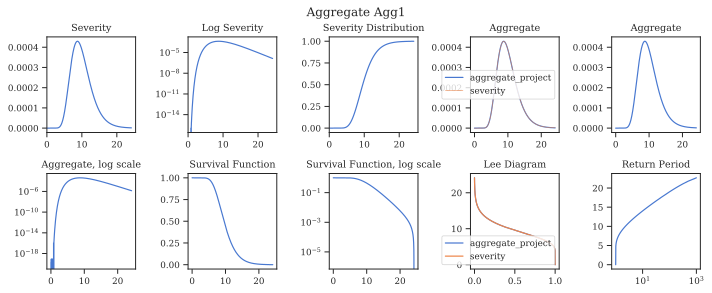

In [89]:
big_test['Agg1'].plot('long')

In [12]:
uw = agg.Underwriter()
uw.update = True
uw.create_all = True 
uw.log2 = 8
uw.bs = 1

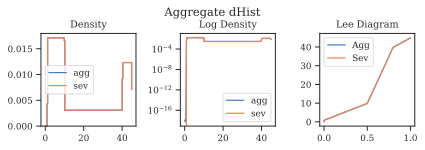

In [22]:
#a = uw.write('agg dHist 1 claim sev dhistogram xps [1, 10, 40] [.5, .3, .2] fixed')
#a = uw.write('agg dHist 1 claim sev chistogram xps [1, 10, 40] [.5, .3, .2] fixed')
a = uw.write('agg dHist 1 claim sev chistogram xps [1, 10, 40, 45] [.5, .3, .2] fixed')
a.plot()

In [7]:
p, a, s = uw.write_test('agg dHist 1 claim sev dhistogram xps [0, 10, 40] [.5, .3, .2] fixed')
a

,exp_attachment,exp_el,exp_en,exp_limit,exp_lr,exp_premium,freq_a,freq_b,freq_name,name,...,sev_a,sev_b,sev_cv,sev_loc,sev_mean,sev_name,sev_ps,sev_scale,sev_wt,sev_xs
dHist,0,0,1.0,inf,0,0,0,0,fixed,dHist,...,0,0,0,0,0,dhistogram,"[0.5, 0.3, 0.2]",0,1,"[0.0, 10.0, 40.0]"


In [54]:
b = uw.write_test('agg wind  1 claim sev dhistogram xps [0,  99] [0.80, 0.20] fixed')
b[1]

,exp_attachment,exp_el,exp_en,exp_limit,exp_lr,exp_premium,freq_a,freq_b,freq_name,name,...,sev_a,sev_b,sev_cv,sev_loc,sev_mean,sev_name,sev_ps,sev_scale,sev_wt,sev_xs
wind,0,0,1.0,inf,0,0,0,0,fixed,wind,...,0,0,0,0,0,dhistogram,"[0.8, 0.2]",0,1,"[0.0, 99.0]"
